<a href="https://colab.research.google.com/github/laxmipranavimallekedi/HDS5210_Instructor/blob/main/week13/week13_assignment_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 13 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Check in your data file along with this exercise. Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("drug_deaths.csv")

df.shape[0], df.shape[1]

(5105, 42)

### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?  If your data has a unique identifier (e.g. a person or visit or record ID) then find the column with the next most number of unique values.

In [7]:
unique_counts = df.nunique()
unique_counts_sorted = unique_counts.sort_values(ascending=False)
print("Number of unique values in each column:")
print(unique_counts_sorted)
most_diverse_col = unique_counts_sorted.index[0]
print(f"\nColumn with most unique values: {most_diverse_col} ({unique_counts_sorted[0]} unique values)")

Number of unique values in each column:
Unnamed: 0             5105
ID                     5105
COD                    3193
Date                   2098
DeathCityGeo            374
ResidenceCity           370
LocationifOther         322
DescriptionofInjury     320
ResidenceCityGeo        289
InjuryCity              234
InjuryCityGeo           226
DeathCity               222
Other                   134
OtherSignifican          92
ResidenceCounty          84
InjuryPlace              71
Age                      65
ResidenceState           26
InjuryCounty             12
Race                     11
DeathCounty               9
Location                  6
Morphine_NotHeroin        6
Fentanyl                  5
MannerofDeath             5
AnyOpioid                 3
InjuryState               3
Sex                       3
DateType                  2
Tramad                    2
OpiateNOS                 2
Hydromorphone             2
Oxymorphone               2
Amphet                    2
Methadon

<ipython-input-7-2be6d741e31e>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"\nColumn with most unique values: {most_diverse_col} ({unique_counts_sorted[0]} unique values)")


### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [8]:
# Find columns where all values are the same
redundant_cols = []
for column in df.columns:
    if df[column].nunique() == 1:
        redundant_cols.append({
            'column': column,
            'unique_value': df[column].iloc[0],  # Get the single value
            'count': len(df)
        })

if redundant_cols:
    print("Found redundant columns:")
    for col in redundant_cols:
        print(f"Column '{col['column']}' has value '{col['unique_value']}' in all {col['count']} rows")
else:
    print("No redundant columns found - all columns have at least 2 unique values")

No redundant columns found - all columns have at least 2 unique values


### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

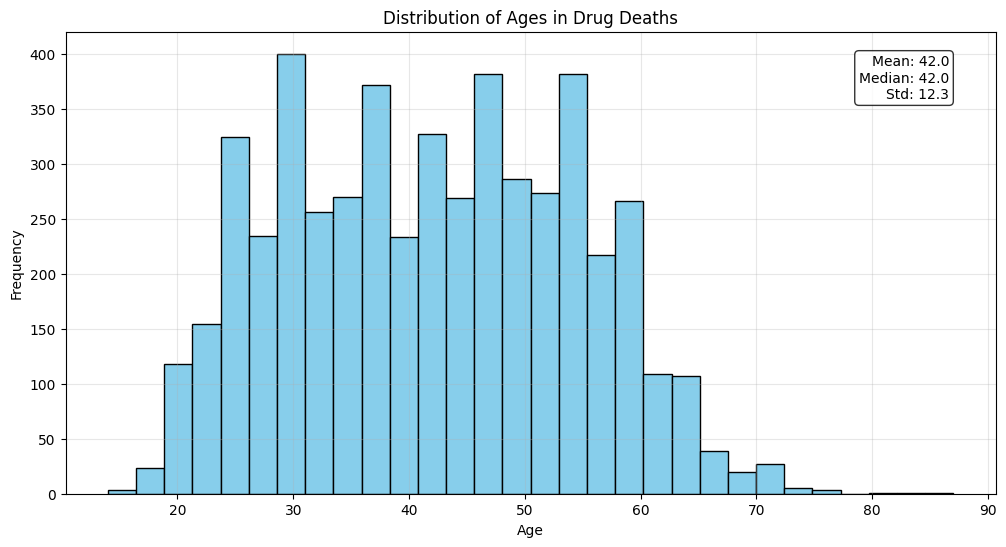


Detailed age statistics:
count    5102.000000
mean       41.964916
std        12.336639
min        14.000000
25%        32.000000
50%        42.000000
75%        52.000000
max        87.000000
Name: Age, dtype: float64


In [9]:
# Create a histogram for Age distribution
plt.figure(figsize=(12, 6))
plt.hist(df['Age'], bins=30, edgecolor='black', color='skyblue')
plt.title('Distribution of Ages in Drug Deaths')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# Add summary statistics as text box
stats = df['Age'].describe()
stats_text = f"Mean: {stats['mean']:.1f}\nMedian: {stats['50%']:.1f}\nStd: {stats['std']:.1f}"
plt.text(0.95, 0.95, stats_text,
         transform=plt.gca().transAxes,
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.show()

# Print detailed summary statistics
print("\nDetailed age statistics:")
print(df['Age'].describe())

### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

<ipython-input-10-795445b706b5>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


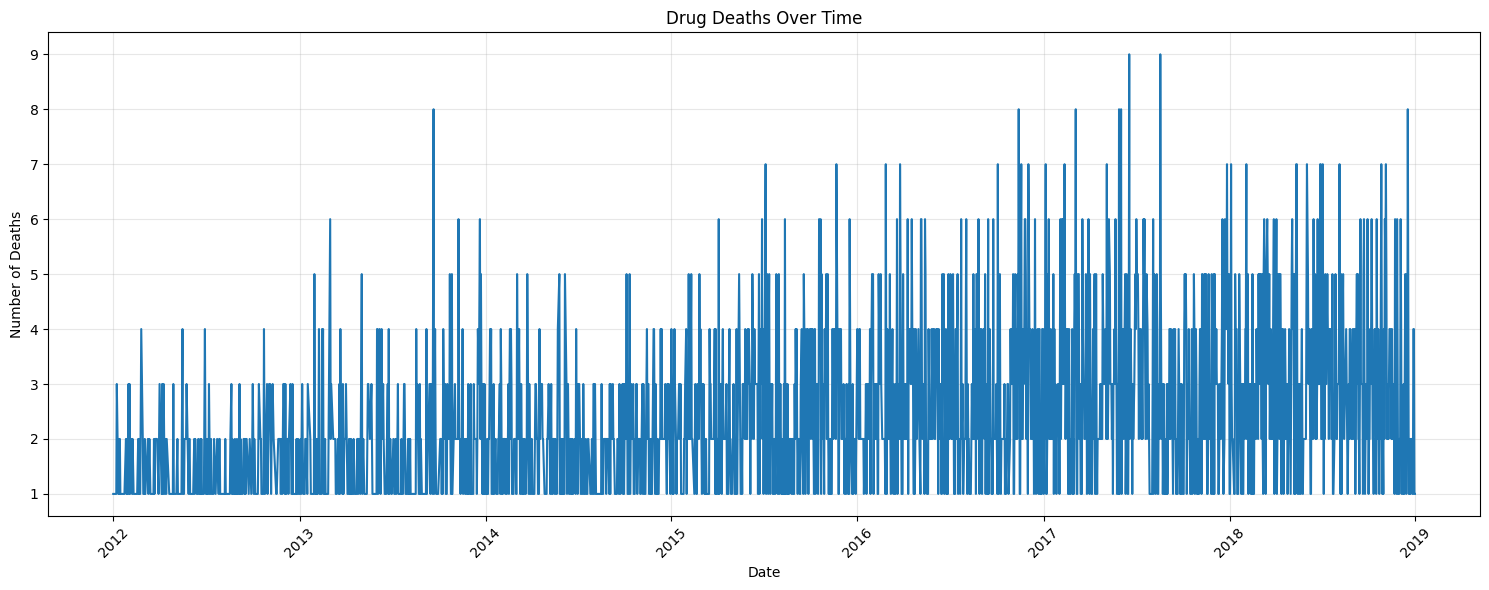

In [10]:
df['Date'] = pd.to_datetime(df['Date'])
deaths_by_date = df.groupby('Date').size()

plt.figure(figsize=(15, 6))
plt.plot(deaths_by_date.index, deaths_by_date.values)
plt.title('Drug Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



---



## Submitting Your Work

Submit your work as usual.